In [1]:
#JAX
import jax
import jax.numpy as jnp
import numpy as np
from jax.config import config
config.update("jax_enable_x64", True)
config.update("jax_debug_nans", True)


/usr/local/Caskroom/miniforge/base/envs/env_jax/lib/python3.8/site-packages/jax/_src/lib/__init__.py:31: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [27]:
import emcee
import numpy as np

x=np.arange(10)
y=3*x+2

def func(args):
    return args[0]*x+args[1]

def log_prob(args):
    return -0.5*((func(args)-y)**2).mean()

In [28]:
nwalkers=5
ndim=2
p0 = np.random.rand(nwalkers, ndim)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)

In [29]:
state = sampler.run_mcmc(p0, 10000)


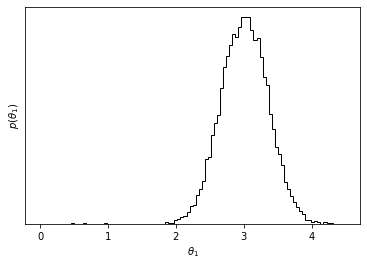

In [30]:
import matplotlib.pyplot as plt

samples = sampler.get_chain(flat=True)
plt.hist(samples[:, 0], 100, color="k", histtype="step")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);